In [1]:
import numpy as np
import pandas as pd

In [7]:
df = pd.read_csv("/Users/dhruviii/Downloads/dataset_DF_data - dataset_DF_data.csv")
df

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
...,...,...,...,...
912995,2017-12-27,10,50,63
912996,2017-12-28,10,50,59
912997,2017-12-29,10,50,74
912998,2017-12-30,10,50,62


In [8]:
df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


In [11]:
df['date'] = pd.to_datetime(df['date'])

In [12]:
df_filtered = df[(df['store'] == 1) & (df['item'] == 1)]

In [13]:
df_filtered = df_filtered.groupby('date').sum().reset_index()

In [14]:
df_filtered.set_index('date', inplace=True)

In [17]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [18]:
model = SARIMAX(df_filtered['sales'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_model = model.fit()


/Users/dhruviii/Documents/SEMESTER 3/AI IN MARKETING/aienv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/dhruviii/Documents/SEMESTER 3/AI IN MARKETING/aienv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.36274D+00    |proj g|=  1.20575D-01

At iterate    5    f=  3.14861D+00    |proj g|=  1.67573D-01

At iterate   10    f=  3.10587D+00    |proj g|=  4.13149D-03

At iterate   15    f=  3.10194D+00    |proj g|=  1.06426D-02

At iterate   20    f=  3.10022D+00    |proj g|=  6.24029D-03

At iterate   25    f=  3.10000D+00    |proj g|=  6.16216D-04

At iterate   30    f=  3.09999D+00    |proj g|=  2.22126D-04

At iterate   35    f=  3.09998D+00    |proj g|=  1.73093D-04

At iterate   40    f=  3.09998D+00    |proj g|=  8.15805D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

In [19]:
forecast = sarima_model.forecast(steps=30)

In [21]:
print(forecast)

2018-01-01    18.521880
2018-01-02    18.387140
2018-01-03    18.179936
2018-01-04    17.928982
2018-01-05    18.019003
2018-01-06    18.408093
2018-01-07    17.840565
2018-01-08    17.996757
2018-01-09    17.212726
2018-01-10    17.802528
2018-01-11    17.362279
2018-01-12    17.126815
2018-01-13    18.101612
2018-01-14    18.053415
2018-01-15    17.539765
2018-01-16    17.979863
2018-01-17    18.121203
2018-01-18    18.150568
2018-01-19    17.783906
2018-01-20    17.818695
2018-01-21    17.360328
2018-01-22    17.691706
2018-01-23    17.951892
2018-01-24    17.504470
2018-01-25    18.172247
2018-01-26    18.119177
2018-01-27    17.622781
2018-01-28    18.023970
2018-01-29    18.162420
2018-01-30    18.212039
Freq: D, Name: predicted_mean, dtype: float64


In [22]:
import matplotlib.pyplot as plt

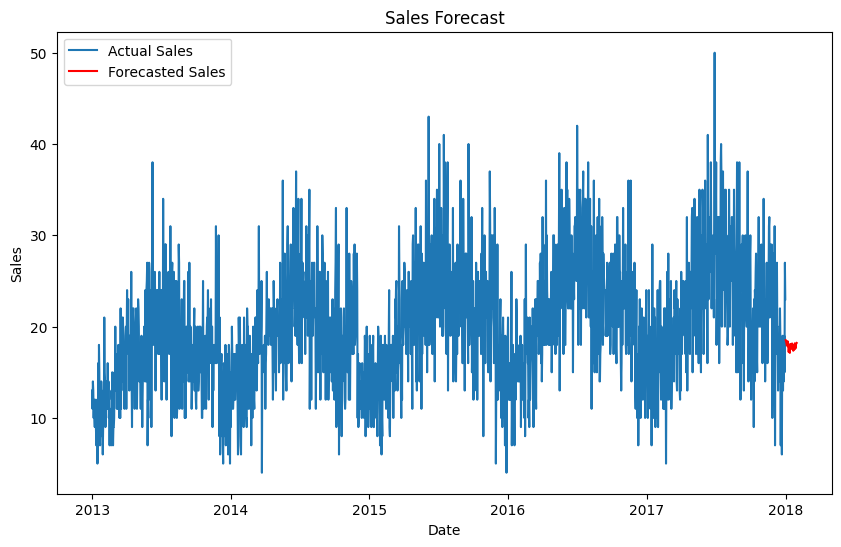

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(df_filtered.index, df_filtered['sales'], label='Actual Sales')
plt.plot(forecast.index, forecast, label='Forecasted Sales', color='red')
plt.title('Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()
